In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [2]:
import keras
print(keras.__version__)

2.3.1


Using TensorFlow backend.


In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18177535298842202316
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6682068255
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5342875759854608877
physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
from keras.datasets import fashion_mnist
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

In [6]:
trainX = trainX/255
testX = testX/255

In [7]:
trainY.shape

(60000,)

In [8]:
from keras.utils import np_utils

# one-hot encode the training and testing labels
trainY = np_utils.to_categorical(trainY, 10)
testY = np_utils.to_categorical(testY, 10)
 
# initialize the label names
labelNames = ["top", "trouser", "pullover", "dress", "coat",
"sandal", "shirt", "sneaker", "bag", "ankle boot"]

In [9]:
categories = np.array(["top", "trouser", "pullover", "dress", "coat",
"sandal", "shirt", "sneaker", "bag", "ankle boot"])

In [10]:
trainX.shape

(60000, 28, 28)

In [11]:
from keras.models import Sequential
from keras.layers import Dense

In [12]:
# train_data has shape: (50, 28, 28, 1) - 50 samples, 28x28 size, 1 for bw

In [13]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [14]:
trainX[1,1,2,:]

array([0.])

In [15]:
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization
#Conv2D is for convolution layers, Flatten - is a connector betweer Conv and Dense layers.

In [16]:
model = Sequential() #Initialize a model

# Add convolution layer
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=((28,28,1)), padding='same'))

# Define what proportion of the further units will be ignored

model.add(Dropout(0.25))
# model.add(BatchNormalization())

model.add(Conv2D(10, kernel_size=3, activation='relu', padding='valid'))

# model.add(MaxPool2D(2))

# Add Flatten layer
model.add(Flatten())

#add a fully-connected layer with 100 neurons
model.add(Dense(100, activation='relu')) 

# #add another layer
model.add(Dense(100, activation='relu'))

#add output layer
model.add(Dense(10, activation='softmax')) # here 10 is the number of classes to classify

In [17]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [18]:
# train_data = trainX.reshape((60000, 784)) # to fit the model's input layer

In [19]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('w.hdf5', monitor='val_loss', save_best_only=True)
callback_list = [checkpoint]

training = model.fit(trainX, trainY, 
          validation_split = 0.05,
          batch_size=100,
          epochs = 10,
           callbacks = callback_list)

Train on 57000 samples, validate on 3000 samples
Epoch 1/10
57000/57000 [==============================] - 6s 99us/step - loss: 0.4856 - accuracy: 0.8269 - val_loss: 0.3200 - val_accuracy: 0.8813
Epoch 2/10
57000/57000 [==============================] - 4s 68us/step - loss: 0.3213 - accuracy: 0.8826 - val_loss: 0.2972 - val_accuracy: 0.8970
Epoch 3/10
57000/57000 [==============================] - 4s 68us/step - loss: 0.2673 - accuracy: 0.9023 - val_loss: 0.2689 - val_accuracy: 0.9023
Epoch 4/10
57000/57000 [==============================] - 4s 68us/step - loss: 0.2342 - accuracy: 0.9128 - val_loss: 0.2477 - val_accuracy: 0.9083
Epoch 5/10
57000/57000 [==============================] - 4s 67us/step - loss: 0.2062 - accuracy: 0.9236 - val_loss: 0.2473 - val_accuracy: 0.9107
Epoch 6/10
57000/57000 [==============================] - 4s 67us/step - loss: 0.1835 - accuracy: 0.9316 - val_loss: 0.2386 - val_accuracy: 0.9157
Epoch 7/10
57000/57000 [==============================] - 4s 68us/ste

In [20]:
# test_data = testX.reshape((10000, 784))

model.load_weights('w.hdf5')

model.evaluate(testX, testY)

10000/10000 [==============================] - 1s 75us/step


[0.2636530778110027, 0.9059000015258789]

<b>Training process

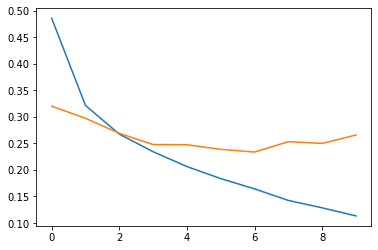

In [21]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])

<b>Understanding of CNN

In [22]:
testX.shape

(10000, 28, 28, 1)

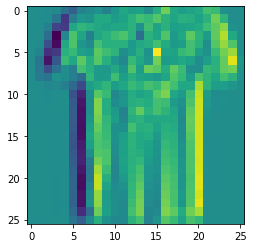

In [23]:
l = model.layers[2]
weights = l.get_weights()



test = testX[3854].reshape((28,28))

kernel1 = weights[0][:, :, 0, 1]


def conv(image, kernel):
    k_h = kernel.shape[0]
    k_w = kernel.shape[1]
    img_h = image.shape[0]
    img_w = image.shape[1]
    result = np.zeros(shape = (img_h - k_h + 1, img_w - k_w + 1))
    
    for ii in range(img_w-k_w+1):
        for jj in range(img_h-k_h+1):
#             result[ii,jj] = np.matmul(image[ii:ii+k_h, jj:jj+k_w], kernel).sum()
            result[ii,jj] = (image[ii:ii+k_h, jj:jj+k_w]*kernel).sum()
    return result

plt.imshow(conv(test, kernel1))

In [24]:
l = model.layers
l

In [25]:
import cv2
from imutils import build_montages

# initialize our list of output images
images = []

for i in np.random.choice(np.arange(0, len(testY)), size=(16,)):
     # classify the clothing
    probs = model.predict(testX[np.newaxis, i])
    prediction = probs.argmax(axis=1)
    label = labelNames[prediction[0]]
    
    image = (testX[i] * 255).astype("uint8")
    
    # initialize the text label color as green (correct)
    color = (0, 255, 0)
 
    # otherwise, the class label prediction is incorrect
    if prediction[0] != np.argmax(testY[i]):
        color = (0, 0, 255)
    image = cv2.merge([image] * 3)
    image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
    cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75,
        color, 2)
 
    # add the image to our list of output images
    images.append(image)
    
# construct the montage for the images
montage = build_montages(images, (96, 96), (4, 4))[0]
 
# show the output montage
cv2.imshow("Fashion MNIST", montage)
cv2.waitKey(0)

-1

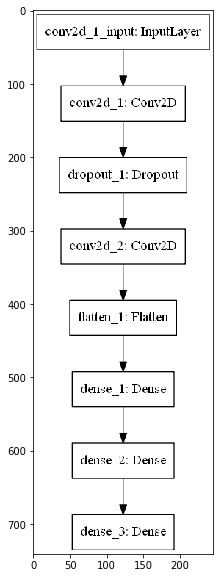

In [26]:
import keras
import pydot
import pydotplus
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

keras.utils.vis_utils.pydot = pydot
plot_model(model, to_file='model.png')
img = plt.imread('model.png')
plt.figure(figsize=(5,10))
plt.imshow(img)